# EDA Final Project

<li> Get an initial sniff: shape, columns information and type, missing values</li>
<li> Initial clean-up: tailor the data, check extreme values, pick features of interest </li>
<li> Explore the categorical features</li>
<li> Explore the numeric features</li>
<li> More advanced: explore string, list, and text features; create more features that help with the exploration, injecting external information </li>
<li> Explore deeper: relationships between features and the target variable, grouping records by features</li>


# EDA

### 1. Initial Look

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
nba_raw = pd.read_excel('NBA_Data/NBA_Stats_71_Years.xlsx')

In [4]:
# Shape
nba_raw.shape

(33329, 31)

In [5]:
# Columns and Types
nba_raw.dtypes

Rank                    int64
Year                   object
Season Start Year       int64
Season Type            object
Player ID               int64
Player                 object
Team ID                 int64
Team                   object
Games Played            int64
Minutes Played          int64
FG Made                 int64
FG Attempts             int64
FG %                  float64
3-Pt FG Made          float64
3-Pt FG Attempts      float64
3-Pt FG %             float64
FT Made                 int64
FT Attempts             int64
FT %                  float64
Offensive Rebounds    float64
Defensive Rebounds    float64
Rebounds                int64
Assists                 int64
Steals                float64
Blocks                float64
Turnovers             float64
Personal Fouls          int64
Points Scored           int64
Efficency               int64
AST/TOV               float64
STL/TOV               float64
dtype: object

In [6]:
nba_raw.head(1)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,FT Made,FT Attempts,FT %,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,548,1222,0.448,NaN,NaN,NaN,578,707,0.818,NaN,NaN,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN


In [7]:
# Columns with NAs
list(nba_raw.columns[nba_raw.isnull().any() == True])

['3-Pt FG Made',
 '3-Pt FG Attempts',
 '3-Pt FG %',
 'Offensive Rebounds',
 'Defensive Rebounds',
 'Steals',
 'Blocks',
 'Turnovers',
 'AST/TOV',
 'STL/TOV']

### 2. Initial Clean Up

In [8]:
nba_raw['Player ID']= nba_raw['Player ID'].astype('category')
nba_raw['Player'] = nba_raw['Player'].astype('category')
nba_raw['Team ID'] = nba_raw['Team ID'].astype('category')
nba_raw['Team']= nba_raw['Team'].astype('category')
nba_raw['Season Type']= nba_raw['Season Type'].astype('category')

In [9]:
nba_raw.rename(columns = {'Efficency':'Efficiency'}, inplace = True)

In [10]:
#Check for weird NAs

nba_raw['3-Pt FG Made'].unique()
nba_raw['3-Pt FG Attempts'].unique()
nba_raw['3-Pt FG %'].unique()
nba_raw['Offensive Rebounds'].unique()
nba_raw['Offensive Rebounds'].unique()
nba_raw['Offensive Rebounds'].unique()
nba_raw['Defensive Rebounds'].unique()
nba_raw['Steals'].unique()
nba_raw['Blocks'].unique()
nba_raw['Turnovers'].unique()
nba_raw['AST/TOV'].unique()
nba_raw['STL/TOV'].unique()

# Don't need to get rid of them

array([ nan, 0.44, 0.38, 0.3 , 0.6 , 0.49, 0.4 , 0.65, 0.39, 0.7 , 0.12,
       0.24, 0.52, 0.41, 0.57, 0.42, 0.53, 0.51, 0.36, 0.34, 0.35, 0.48,
       0.47, 0.63, 0.98, 0.43, 0.73, 0.25, 0.31, 0.46, 0.28, 0.18, 0.67,
       0.19, 0.22, 0.32, 0.55, 0.29, 0.71, 0.37, 0.15, 0.72, 0.75, 1.02,
       1.05, 0.26, 0.56, 0.54, 0.59, 0.68, 0.82, 0.66, 0.45, 0.92, 0.76,
       0.97, 1.49, 0.5 , 0.9 , 1.07, 0.77, 0.83, 0.58, 0.89, 1.1 , 0.61,
       0.27, 0.69, 0.2 , 0.84, 1.01, 0.78, 0.17, 1.31, 0.08, 0.62, 0.23,
       0.86, 0.  , 0.33, 0.16, 0.14, 1.  , 1.67, 0.74, 0.1 , 0.13, 0.87,
       1.25, 0.21, 1.13, 0.09, 0.64, 0.91, 1.2 , 1.6 , 0.8 , 4.  , 1.09,
       0.99, 1.63, 0.93, 0.96, 0.81, 1.22, 0.88, 1.11, 1.03, 1.4 , 0.85,
       0.94, 1.41, 0.11, 0.79, 2.5 , 1.28, 1.53, 3.33, 1.33, 3.  , 5.  ,
       1.06, 1.04, 1.27, 1.45, 1.12, 0.95, 1.17, 1.32, 1.15, 1.5 , 2.  ,
       1.08, 1.16, 1.52, 1.18, 1.95, 1.14, 1.73, 1.3 , 1.76, 3.2 , 1.37,
       1.75, 1.78, 1.24, 0.05, 0.07, 1.83, 2.33, 2.

### 3. Categorical

In [11]:
# Check Teams

list(nba_raw['Team'].unique())

pd.crosstab(index=nba_raw['Team'],columns='count').T

Team,ATL,BAL,BKN,BLT,BOS,BUF,CAP,CHA,CHH,CHI,CHP,CHZ,CIN,CLE,DAL,DEN,DET,FTW,GOS,GSW,HOU,IND,INO,KCK,LAC,LAL,MEM,MIA,MIH,MIL,MIN,MNL,NJN,NOH,NOJ,NOK,NOP,NYK,NYN,OKC,ORL,PHI,PHL,PHW,PHX,POR,ROC,SAC,SAN,SAS,SDC,SDR,SEA,SFW,STL,SYR,TOR,UTA,UTH,VAN,WAS
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1225,49,305,179,1668,117,24,344,288,1215,13,16,238,1056,953,1039,1299,131,457,564,1148,1016,39,208,810,1473,532,854,62,1214,649,180,692,204,57,32,210,1438,12,383,719,640,660,205,1143,1195,102,708,456,708,82,59,799,172,285,263,625,642,382,86,1005


In [12]:
# Look at Season Type breakdown

pd.crosstab(index=nba_raw['Season Type'], columns='count')

col_0,count
Season Type,
Playoffs,10497
Regular Season,22832


In [13]:
# Players with most/least season entries
tab = pd.crosstab(index=nba_raw['Player'], columns='count')
tab.sort_values(ascending=False, by='count')

col_0,count
Player,
Eddie Johnson,42
John Stockton,38
Kareem Abdul-Jabbar,38
Mike Dunleavy,38
Karl Malone,38
...,...
Jabari Bird,1
Robert Rose,1
JaQuori McLaughlin,1


### 4. Numerical

In [14]:
nba_raw.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV'],
      dtype='object')

In [15]:
nba_raw.describe()

,Rank,Season Start Year,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,FT Made,FT Attempts,FT %,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficiency,AST/TOV,STL/TOV
count,33329.000000,33329.000000,33329.000000,33329.000000,33329.000000,33329.000000,33329.000000,27033.000000,27033.000000,27033.000000,33329.000000,33329.000000,33329.000000,29100.000000,29100.000000,33329.000000,33329.000000,29100.000000,29100.000000,27763.000000,33329.000000,33329.000000,33329.000000,27763.000000,27763.000000
mean,161.709322,1995.718953,40.082391,960.404423,157.218158,343.915059,0.430677,21.955055,62.314209,0.212725,80.694950,107.216148,0.679771,48.599553,120.508969,178.413364,92.243692,31.600172,19.702577,57.969492,90.641303,412.938912,466.882505,1.412655,0.573464
std,126.508479,18.247005,30.295572,938.065045,182.051106,386.520808,0.122874,40.066390,106.737292,0.196431,106.516858,137.413257,0.234667,62.840890,140.814189,215.528972,128.236587,36.784919,33.219221,65.343339,84.917607,479.021978,527.376360,1.094306,0.480922
min,1.000000,1951.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000,0.000000
25%,59.000000,1983.000000,9.000000,141.000000,18.000000,43.000000,0.391000,0.000000,1.000000,0.000000,8.000000,12.000000,0.629000,5.000000,15.000000,22.000000,8.000000,4.000000,1.000000,7.000000,15.000000,48.000000,54.000000,0.690000,0.310000
50%,130.000000,1998.000000,39.000000,589.000000,79.000000,181.000000,0.440000,3.000000,10.000000,0.250000,36.000000,50.000000,0.742000,23.000000,66.000000,95.000000,39.000000,17.000000,7.000000,32.000000,60.000000,209.000000,244.000000,1.220000,0.500000
75%,240.000000,2011.000000,72.000000,1687.000000,247.000000,546.000000,0.488000,24.000000,72.000000,0.357000,114.000000,155.000000,0.816000,67.000000,182.000000,261.000000,126.000000,49.000000,23.000000,91.000000,155.000000,645.000000,747.000000,1.950000,0.730000
max,582.000000,2022.000000,85.000000,3882.000000,1597.000000,3159.000000,1.000000,402.000000,1028.000000,1.000000,840.000000,1363.000000,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,4183.000000,21.000000,8.000000


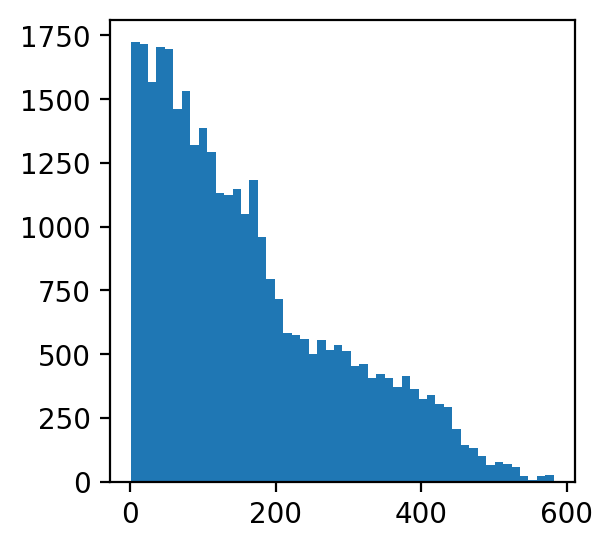

In [16]:
# Check Rank Distribution
fig,ax=plt.subplots(figsize=(3,3))
ax.hist(nba_raw['Rank'], bins=50)
plt.show()

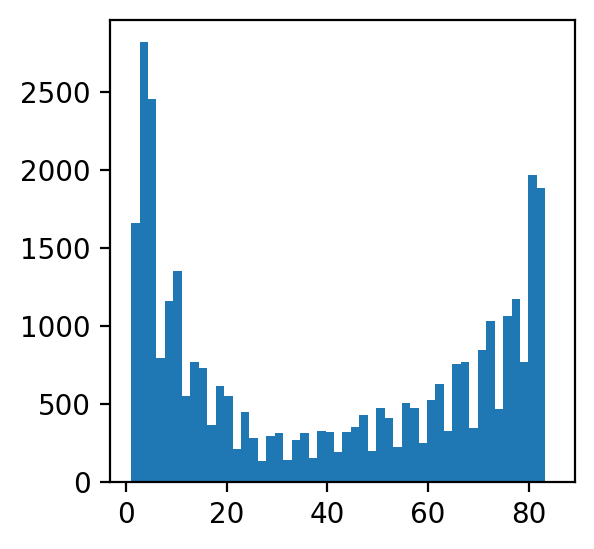

In [17]:
fig,ax=plt.subplots(figsize=(3,3))
ax.hist(nba_raw['Games Played'],bins=50)
plt.show()

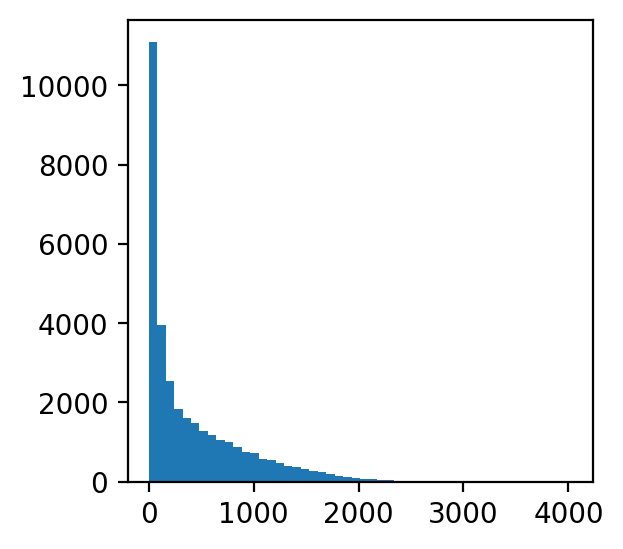

In [18]:
fig,ax=plt.subplots(figsize=(3,3))
ax.hist(nba_raw['Points Scored'],bins=50)
plt.show()

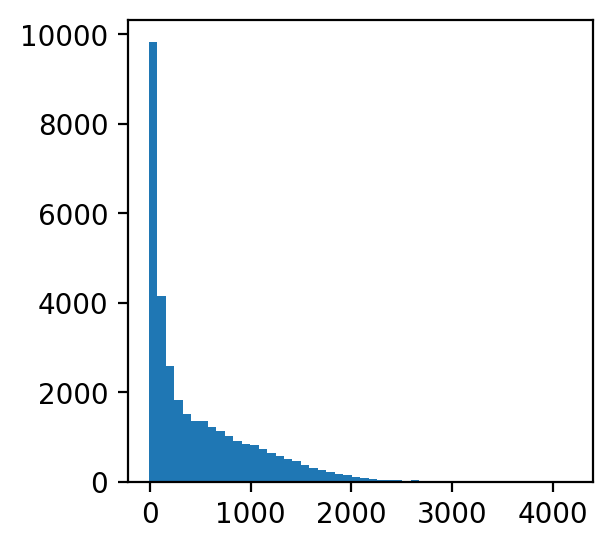

In [19]:
fig,ax=plt.subplots(figsize=(3,3))
ax.hist(nba_raw['Efficiency'],bins=50)
plt.show()

### 5. More Complicated Data

In [20]:
# Look into Year

nba_raw['Year'].unique()  # Not super useful

array(['1951-52', '1952-53', '1953-54', '1954-55', '1955-56', '1956-57',
       '1957-58', '1958-59', '1959-60', '1960-61', '1961-62', '1962-63',
       '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69',
       '1969-70', '1970-71', '1971-72', '1972-73', '1973-74', '1974-75',
       '1975-76', '1976-77', '1977-78', '1978-79', '1979-80', '1980-81',
       '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87',
       '1987-88', '1988-89', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23'],
      dtype=object)

In [21]:
# Look at Season Start Year instead

nba_raw['Season Start Year'].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [22]:
# Don't necessarily need to convert from integer since we only have year

pd.to_datetime(nba_raw['Season Start Year'], format='%Y')

0       1951-01-01
1       1951-01-01
2       1951-01-01
3       1951-01-01
4       1951-01-01
           ...    
33324   2022-01-01
33325   2022-01-01
33326   2022-01-01
33327   2022-01-01
33328   2022-01-01
Name: Season Start Year, Length: 33329, dtype: datetime64[ns]

In [23]:
# Make copy in case need to revert

nba = nba_raw.copy()

In [24]:
# Make a new categorical column called 'decade' for each record

nba['decade'] = (nba['Season Start Year']//10)*10
nba['decade'] = nba['decade'].astype('category')  # Encode

In [25]:
# Make new columns to for further analysis 

# Attempts
nba['3-Pt FG Attempts Per Game'] = nba['3-Pt FG Attempts']/nba['Games Played']
nba['FG Attempts Per Game'] = nba['FG Attempts']/nba['Games Played']
nba['FT Attempts Per Game'] = nba['FT Attempts']/nba['Games Played']


# Made 
nba['3-Pt FG Made Per Game'] = nba['3-Pt FG Made']/nba['Games Played']
nba['FG Made Per Game'] = nba['FG Made']/nba['Games Played']
nba['FT Made Per Game'] = nba['FT Made']/nba['Games Played']

# For Year > 1979 only
nba['2-Pt FG Made Per Game'] = nba['FG Made Per Game']-nba['3-Pt FG Made Per Game']
nba['2-Pt FG Attempts Per Game'] = nba['FG Attempts Per Game']-nba['3-Pt FG Attempts Per Game']


In [26]:
# Make new columns for Percentages of Shot Types (3-pt FG, 2-Pt FG, and FTs)

nba['3-Pt FG Points/Scored Points'] = 0
nba['2-Pt FG Points/Scored Points'] = 0

for i in range(len(nba)):
    if nba['Season Start Year'][i] > 1979:
        nba['3-Pt FG Points/Scored Points'][i] = nba['3-Pt FG Made'][i] * \
            3/nba['Points Scored'][i]

for i in range(len(nba)):
    if nba['Season Start Year'][i] < 1979:
        nba['2-Pt FG Points/Scored Points'][i] = (
            nba['FG Made'][i])*2 / nba['Points Scored'][i]
    else:
        nba['2-Pt FG Points/Scored Points'][i] = (
            nba['FG Made'][i]-nba['3-Pt FG Made'][i])*2 / nba['Points Scored'][i]

nba['FT Points/Scored Points'] = nba['FT Made']/nba['Points Scored']

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1194555916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['3-Pt FG Points/Scored Points'][i] = nba['3-Pt FG Made'][i] * \
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1194555916.py:8: RuntimeWarning: invalid value encountered in scalar divide
  nba['3-Pt FG Points/Scored Points'][i] = nba['3-Pt FG Made'][i] * \
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1194555916.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['2-Pt FG Points/Scored Points'][i] = (
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/

### 6. Further Exploration and Visualizations

In [27]:
# Averages grouped by decade; drop nonsensical cols for new data frame

nba_by_decade = nba.groupby('decade').mean()
nba_by_decade = nba_by_decade.drop(columns=['Rank', 'Season Start Year'])

nba_by_decade_post_1980 = nba[nba['Season Start Year']>1979].copy().groupby('decade').mean()
nba_by_decade_post_1980 = nba_by_decade_post_1980.drop(columns=['Rank', 'Season Start Year'])

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/2585175.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_by_decade = nba.groupby('decade').mean()
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/2585175.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_by_decade_post_1980 = nba[nba['Season Start Year']>1979].copy().groupby('decade').mean()


/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/244468446.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,.2,.4,.6,.8,1.0], x=0)
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/244468446.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1950,1960,1970,1980,1990,2000,2010,2020],  fontsize=12)


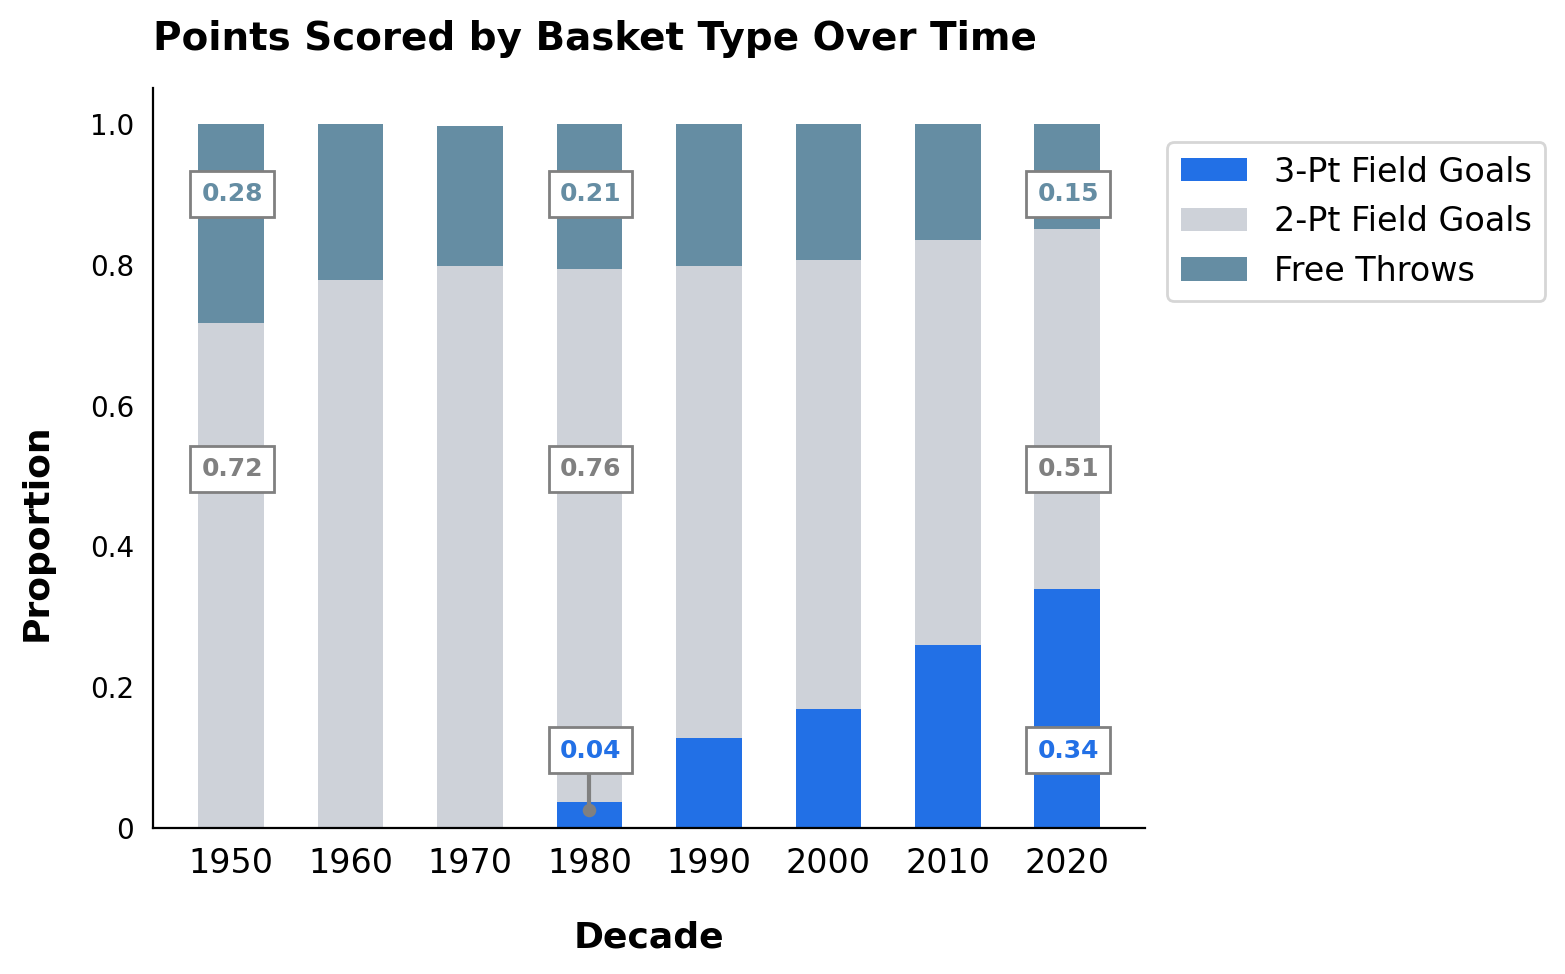

In [29]:
x = nba_by_decade.index
ft = nba_by_decade['FT Points/Scored Points']
twos = nba_by_decade['2-Pt FG Points/Scored Points']
threes = nba_by_decade['3-Pt FG Points/Scored Points']

list_ft = list(round(ft,2))
list_threes = list(round(threes,2))
list_twos = list(round(twos,2))

fig, ax = plt.subplots()

ax.bar(x, threes,  width=5.5, label="3-Pt Field Goals", color='#2270e6')
ax.bar(x,  twos,  bottom=threes, width=5.5, label="2-Pt Field Goals", color='#ced2d9')
ax.bar(x, ft, bottom=twos+threes, width=5.5, label="Free Throws", color='#658da3')

ax.set_yticklabels([0,.2,.4,.6,.8,1.0], x=0)
ax.set_xticklabels([0, 1950,1960,1970,1980,1990,2000,2010,2020],  fontsize=12)

ax.set_ylabel("Proportion", fontsize=13,weight='bold')
ax.set_xlabel("Decade", fontsize=13, weight='bold')
ax.set_title("Points Scored by Basket Type Over Time", fontsize=14,
             x=0, y=1.03, weight='bold', horizontalalignment='left')

ax.yaxis.set_ticks_position('none') 
ax.yaxis.set_label_coords(x=-.1,y=.4)

ax.xaxis.set_ticks_position('none') 
ax.xaxis.set_label_coords(x=.5,y=-.125)


plt.legend(loc='upper right', bbox_to_anchor=(1.42, .95), frameon=True, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(1947.5, .5, f'{list_twos[0]}',weight='bold',color='gray',fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))
ax.text(1947.5, .89, f'{list_ft[0]}',weight='bold',fontsize=9,c='#658da3',bbox=dict(facecolor='white', edgecolor='gray'))

ax.text(1977.5, .5, f'{list_twos[3]}',weight='bold',color='gray',fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))
ax.text(1977.5, .89, f'{list_ft[3]}',weight='bold',fontsize=9,c='#658da3',bbox=dict(facecolor='white', edgecolor='gray'))
ax.text(1977.5, .1, f'{list_threes[3]}',weight='bold',fontsize=9,c='#2270e6',bbox=dict(facecolor='white', edgecolor='gray'))
ax.vlines(1980,ymin=.025,ymax=.1, color='gray')
ax.scatter(1980,.025,color='gray',s=15)

ax.text(2017.5, .5, f'{list_twos[-1]}',weight='bold',color='gray',fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))
ax.text(2017.5, .89, f'{list_ft[-1]}',weight='bold',fontsize=9,c='#658da3',bbox=dict(facecolor='white', edgecolor='gray'))
ax.text(2017.5, .1, f'{list_threes[-1]}',weight='bold',fontsize=9,c='#2270e6',bbox=dict(facecolor='white', edgecolor='gray'))


plt.show()

In [33]:
# Look at new players for 2022

nba_2022 = nba[nba['Season Start Year'] >= 2021]

first_seasons = nba_2022.groupby('Player ID')['Season Start Year'].min()

rookies = nba_2022[nba_2022.apply(
    lambda row: row['Season Start Year'] == first_seasons[row['Player ID']], axis=1)]

In [34]:
rookies_2022_reg = rookies[rookies['Season Type'] == 'Regular Season']
rookies_2022_reg_list = list(rookies_2022_reg['Player'])

rookies_2022_playoff = rookies[rookies['Season Type'] == 'Playoffs']
rookies_2022_playoff_list = list(rookies_2022_playoff['Player'])

In [35]:
rookies_in_both = [i for i in rookies_2022_reg_list if i in rookies_2022_playoff_list]

rookies_2022_reg['Moved on'] = rookies_2022_reg['Player'].isin(rookies_in_both)

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1086538584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookies_2022_reg['Moved on'] = rookies_2022_reg['Player'].isin(rookies_in_both)


In [36]:
rookies_2022_reg.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV', 'decade', '3-Pt FG Attempts Per Game',
       'FG Attempts Per Game', 'FT Attempts Per Game', '3-Pt FG Made Per Game',
       'FG Made Per Game', 'FT Made Per Game', '2-Pt FG Made Per Game',
       '2-Pt FG Attempts Per Game', '3-Pt FG Points/Scored Points',
       '2-Pt FG Points/Scored Points', 'FT Points/Scored Points', 'Moved on'],
      dtype='object')

In [37]:
rookies_2022_reg['Points Scored/48 Mins'] = (rookies_2022_reg['Points Scored']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Efficiency/48 Mins'] = (rookies_2022_reg['Efficiency']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['3-Pt FG Made/48 Mins'] = (rookies_2022_reg['3-Pt FG Made']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['FTs Made/48 Mins'] = (rookies_2022_reg['FT Made']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Offensive Rebounds/48 Mins'] = (rookies_2022_reg['Offensive Rebounds']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Defensive Rebounds/48 Mins'] = (rookies_2022_reg['Defensive Rebounds']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Assists/48 Mins'] = (rookies_2022_reg['Assists']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Steals/48 Mins'] = (rookies_2022_reg['Steals']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Blocks/48 Mins'] = (rookies_2022_reg['Blocks']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Turnovers/48 Mins'] = (rookies_2022_reg['Turnovers']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['Personal Fouls/48 Mins'] = (rookies_2022_reg['Personal Fouls']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['FT Attempts/48 Mins'] = (rookies_2022_reg['FT Attempts']/rookies_2022_reg['Minutes Played'])*48
rookies_2022_reg['FG Attempts/48 Mins'] = (rookies_2022_reg['FG Attempts']/rookies_2022_reg['Minutes Played'])*48

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1344908474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookies_2022_reg['Points Scored/48 Mins'] = (rookies_2022_reg['Points Scored']/rookies_2022_reg['Minutes Played'])*48
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1344908474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookies_2022_reg['Efficiency/48 Mins'] = (rookies_2022_reg['Efficiency']/rookies_2022_reg['Minutes Played'])*48
/var/folders/fh/5d__cjxd4s

In [38]:
three_pt_fg_list = list(round(moved_on_vs_not['3-Pt FG %'],3)*100)

NameError: name 'moved_on_vs_not' is not defined

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1381551633.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moved_on_vs_not = rookies_2022_reg.groupby('Moved on').mean()
/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_37984/1381551633.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(['0%','5%','10%','15%','20%','25%','30%'])


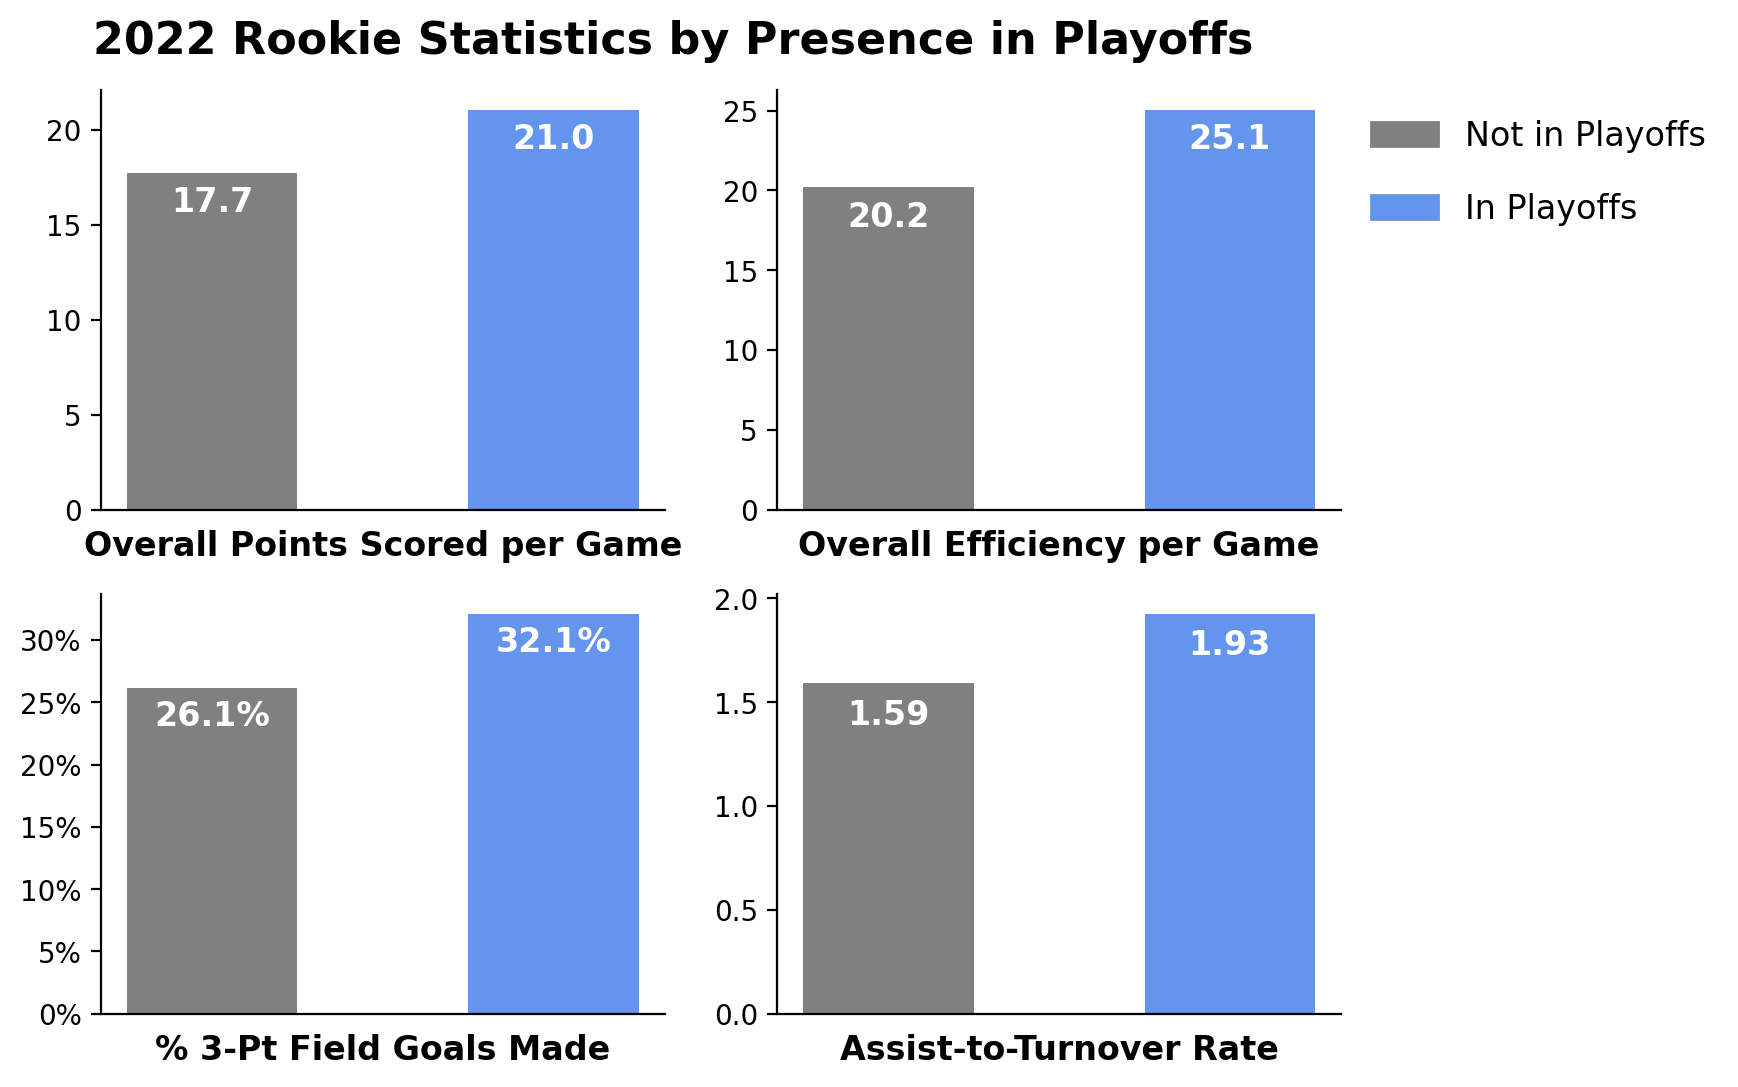

In [39]:
moved_on_vs_not = rookies_2022_reg.groupby('Moved on').mean()

points_per_48_list = list(round(moved_on_vs_not['Points Scored/48 Mins'],1))
eff_per_48_list = list(round(moved_on_vs_not['Efficiency/48 Mins'],1))
three_pt_fg_list = list(round(moved_on_vs_not['3-Pt FG %'],3)*100)
AST_TOV_list = list(round(moved_on_vs_not['AST/TOV'],2))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

axes[0][0].bar(moved_on_vs_not.index, moved_on_vs_not['Points Scored/48 Mins'], width=.5, color=['gray','cornflowerblue'])
axes[0][0].set_title('Overall Points Scored per Game',y=-.15, weight='bold')
axes[0][0].set_xticks([])
axes[0][0].spines['top'].set_visible(False)
axes[0][0].spines['right'].set_visible(False)
axes[0][0].text(0, points_per_48_list[0]-2, f'{points_per_48_list[0]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)
axes[0][0].text(1, points_per_48_list[1]-2, f'{points_per_48_list[1]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)


axes[0][1].bar(moved_on_vs_not.index, moved_on_vs_not['Efficiency/48 Mins'], width=.5, color=['gray','cornflowerblue'])
axes[0][1].set_title('Overall Efficiency per Game',y=-.15, weight='bold')
axes[0][1].set_xticks([])
axes[0][1].spines['top'].set_visible(False)
axes[0][1].spines['right'].set_visible(False)
axes[0][1].text(0, eff_per_48_list[0]-2.5, f'{eff_per_48_list[0]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)
axes[0][1].text(1, eff_per_48_list[1]-2.5, f'{eff_per_48_list[1]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)


axes[1][0].bar(moved_on_vs_not.index, moved_on_vs_not['3-Pt FG %'], width=.5, color=['gray','cornflowerblue'])
axes[1][0].set_title('% 3-Pt Field Goals Made',y=-.15, weight='bold')
axes[1][0].set_xticks([])
axes[1][0].set_yticklabels(['0%','5%','10%','15%','20%','25%','30%'])
axes[1][0].spines['top'].set_visible(False)
axes[1][0].spines['right'].set_visible(False)
axes[1][0].text(0, .261-.03, f'{three_pt_fg_list[0]}%',weight='bold',color='white',horizontalalignment='center',fontsize=12)
axes[1][0].text(1, .321-.03, f'{three_pt_fg_list[1]}%',weight='bold',color='white',horizontalalignment='center',fontsize=12)


axes[1][1].bar(moved_on_vs_not.index, moved_on_vs_not['AST/TOV'], width=.5, color=['gray','cornflowerblue'])
axes[1][1].set_title('Assist-to-Turnover Rate',y=-.15, weight='bold')
axes[1][1].set_xticks([])
axes[1][1].spines['top'].set_visible(False)
axes[1][1].spines['right'].set_visible(False)
axes[1][1].text(0, AST_TOV_list[0]-.2, f'{AST_TOV_list[0]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)
axes[1][1].text(1, AST_TOV_list[1]-.2, f'{AST_TOV_list[1]}',weight='bold',color='white',horizontalalignment='center',fontsize=12)


colors = {'Not in Playoffs':'gray', 'In Playoffs ':'cornflowerblue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, labelspacing=1.2, loc='upper right', bbox_to_anchor=(1.7,2.2),frameon=False, fontsize=12)

axes[0][0].text(1.35, 24, '2022 Rookie Statistics by Presence in Playoffs',fontsize=16,horizontalalignment='center',weight='bold')

plt.show()